In [22]:
import pandas as pd
pd.set_option('display.max_rows', 15)  # 모든 행을 출력하도록 설정
pd.options.mode.chained_assignment = None 

In [23]:
Bloomberg = pd.read_csv('/home/user/exercise_j/TwitterXAPI/BloombergCrypto_classified.csv')
Gavin = pd.read_csv('/home/user/exercise_j/TwitterXAPI/GavinWood_classified.csv')
Timbeiko = pd.read_csv('/home/user/exercise_j/TwitterXAPI/timbeiko_eth_classified.csv')
Arthur = pd.read_csv('/home/user/exercise_j/TwitterXAPI/ArthurHayes_classified.csv')
Jesse = pd.read_csv('/home/user/exercise_j/TwitterXAPI/JesseEckel_classified.csv')

In [24]:
df = pd.concat([Bloomberg,Gavin,Timbeiko,Arthur,Jesse], axis=0)

# 인덱스 재설정 (필요한 경우)
df.reset_index(drop=True, inplace=True)

df

,created_at,text,ticker,sentiment_score
0,2024-01-05T09:23:30.000Z,RT @RChoongWilkins: All of this happened in Ch...,NaN,NaN
1,2024-01-05T09:00:12.000Z,Nigeria’s central bank releases guidelines for...,NaN,NaN
2,2024-01-05T08:00:12.000Z,Turkey's president has appointed crypto asset ...,ticker,0.0
3,2024-01-05T07:00:10.000Z,MicroStrategy co-founder Michael Saylor is sel...,BTC,-0.5
4,2024-01-05T06:00:08.000Z,Crypto wallet-maker Ledger says it will cover ...,NaN,NaN
...,...,...,...,...
9881,2021-10-22T20:22:43.000Z,@NiftyPhoebe @Strongblock_io @WithoutTheRope T...,NaN,0.0
9882,2021-10-22T20:11:12.000Z,@NiftyPhoebe @Strongblock_io @WithoutTheRope H...,NFTY,0.0
9883,2021-09-14T14:13:32.000Z,@Tripkebab @PancakeSwap This made me laugh😂,NaN,NaN
9884,2021-09-14T12:56:43.000Z,@PancakeSwap 8 Days away does anyone know what...,NaN,NaN


In [25]:
df = df.dropna(subset=['sentiment_score', 'ticker'])

# 'created_at' 열을 날짜 형식으로 변환
df['created_at'] = pd.to_datetime(df['created_at']).dt.strftime('%Y-%m-%d')
df['ticker'] = df['ticker'].str.replace('"', '')

# 결과 출력
print(df)

      created_at                                               text  ticker  \
2     2024-01-05  Turkey's president has appointed crypto asset ...  ticker   
3     2024-01-05  MicroStrategy co-founder Michael Saylor is sel...     BTC   
5     2024-01-05  Grayscale CEO Michael Sonnenshein said the US ...     BTC   
6     2024-01-05  BlackRock named Jane Street and JPMorgan as th...     BTC   
9     2024-01-05  If approved, a spot Bitcoin ETF will draw pens...     BTC   
...          ...                                                ...     ...   
9874  2021-11-23  @ultrasoundEdik @romedaofinance I was thinking...    ROME   
9877  2021-11-22                 @juspect0x @romedaofinance I wish😭     ROM   
9878  2021-11-22  @_Mr__S__ @romedaofinance That’s soo good🙌🏻 Do...     RMD   
9879  2021-11-22  @jofnosso @romedaofinance It just looks like a...     TRX   
9882  2021-10-22  @NiftyPhoebe @Strongblock_io @WithoutTheRope H...    NFTY   

      sentiment_score  
2                0.00  
3  

In [26]:
df['ticker'] = df['ticker'].str.replace('FTX', 'FTT')
# pd.set_option('display.max_rows', None)  # 모든 행을 출력하도록 설정
ticker_counts = df['ticker'].value_counts()
print(ticker_counts)

ticker
ETH       2449
ticker    1523
BTC       1097
SOL        748
DOT        416
          ... 
RMD          1
ZIPMEX       1
-            1
OKX          1
GEM          1
Name: count, Length: 265, dtype: int64


#### 10개 이상의 트윗이 있는 티커 구분

In [27]:
tickers_to_keep = ticker_counts[ticker_counts > 9].index

# 해당하는 'ticker' 값만을 가진 행들을 유지
df_filtered = df[df['ticker'].isin(tickers_to_keep)]

# 결과 출력
ticker_counts2 = df_filtered['ticker'].value_counts()
print(ticker_counts2)

ticker
ETH       2449
ticker    1523
BTC       1097
SOL        748
DOT        416
          ... 
SBF         12
TON         10
USDT        10
GBTC        10
KSM         10
Name: count, Length: 25, dtype: int64


In [28]:
df_filtered = df_filtered[~df_filtered['ticker'].isin(['','ticker','LUNA','COIN','NFT','N/A','GMX','USDC','SBF','USDT','GBTC','KSM'])]
# df_filtered = df_filtered.reset_index(drop=True, inplace=True)
ticker_counts2 = df_filtered['ticker'].value_counts()
print(ticker_counts2)

ticker
ETH      2449
BTC      1097
SOL       748
DOT       416
BNB       158
FTT       128
MATIC      35
UNI        31
XRP        31
TRX        13
DOGE       13
LINK       13
TON        10
Name: count, dtype: int64


In [29]:
df_filtered 

,created_at,text,ticker,sentiment_score
3,2024-01-05,MicroStrategy co-founder Michael Saylor is sel...,BTC,-0.50
5,2024-01-05,Grayscale CEO Michael Sonnenshein said the US ...,BTC,0.00
6,2024-01-05,BlackRock named Jane Street and JPMorgan as th...,BTC,0.25
9,2024-01-05,"If approved, a spot Bitcoin ETF will draw pens...",BTC,0.50
10,2024-01-04,An ETF startup is trying to launch a Bitcoin f...,BTC,0.00
...,...,...,...,...
9825,2022-05-01,Unpopular opinion: Kylo Ren should’ve been the...,BTC,0.00
9826,2022-05-01,Project under 100 million marketcap that you ...,BTC,0.00
9830,2022-04-29,@simsalacrypto Really? I think people will fom...,ETH,0.80
9831,2022-04-29,Will Ethereum 2.0 upgrade kick off the next bu...,ETH,0.75


In [30]:
a = df_filtered.reset_index(drop=True)
print(a)

      created_at                                               text ticker  \
0     2024-01-05  MicroStrategy co-founder Michael Saylor is sel...    BTC   
1     2024-01-05  Grayscale CEO Michael Sonnenshein said the US ...    BTC   
2     2024-01-05  BlackRock named Jane Street and JPMorgan as th...    BTC   
3     2024-01-05  If approved, a spot Bitcoin ETF will draw pens...    BTC   
4     2024-01-04  An ETF startup is trying to launch a Bitcoin f...    BTC   
...          ...                                                ...    ...   
5137  2022-05-01  Unpopular opinion: Kylo Ren should’ve been the...    BTC   
5138  2022-05-01  Project under 100 million marketcap  that you ...    BTC   
5139  2022-04-29  @simsalacrypto Really? I think people will fom...    ETH   
5140  2022-04-29  Will Ethereum 2.0 upgrade kick off the next bu...    ETH   
5141  2021-11-22  @jofnosso @romedaofinance It just looks like a...    TRX   

      sentiment_score  
0               -0.50  
1              

#### 데이터 분포 시계열 시각화

In [31]:
import matplotlib.pyplot as plt

In [32]:
print(ticker_counts2)

ticker
ETH      2449
BTC      1097
SOL       748
DOT       416
BNB       158
FTT       128
MATIC      35
UNI        31
XRP        31
TRX        13
DOGE       13
LINK       13
TON        10
Name: count, dtype: int64


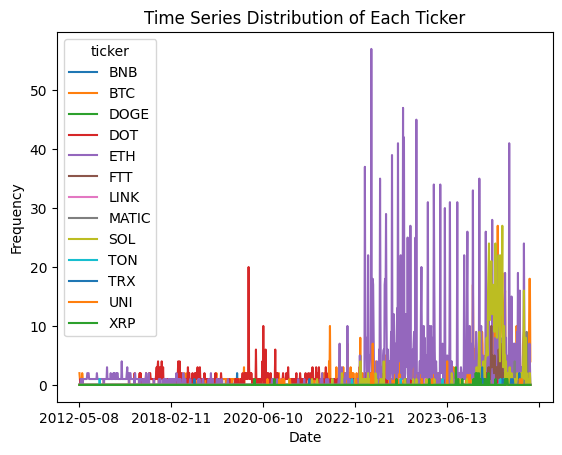

In [33]:
df_grouped = df_filtered.groupby(['ticker', 'created_at']).size().unstack(fill_value=0)

# 시계열 그래프 그리기
df_grouped.T.plot(kind='line') # 'bar'는 막대 그래프, 'line'은 선 그래프
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Time Series Distribution of Each Ticker')
plt.show()

#### 100개 이상의 트윗으로 다시 정리

In [34]:
df_filtered2 = df_filtered[~df_filtered['ticker'].isin(['','MATIC','UNI','XRP','TRX','DOGE','LINK','TON','LUNA','COIN','NFT','N/A','GMX','USDC','SBF','USDT','GBTC','KSM'])]
# df_filtered = df_filtered.reset_index(drop=True, inplace=True)
ticker_counts3 = df_filtered2['ticker'].value_counts()
print(ticker_counts3)

ticker
ETH    2449
BTC    1097
SOL     748
DOT     416
BNB     158
FTT     128
Name: count, dtype: int64


In [35]:
b = df_filtered2.reset_index(drop=True)
print(b)

      created_at                                               text ticker  \
0     2024-01-05  MicroStrategy co-founder Michael Saylor is sel...    BTC   
1     2024-01-05  Grayscale CEO Michael Sonnenshein said the US ...    BTC   
2     2024-01-05  BlackRock named Jane Street and JPMorgan as th...    BTC   
3     2024-01-05  If approved, a spot Bitcoin ETF will draw pens...    BTC   
4     2024-01-04  An ETF startup is trying to launch a Bitcoin f...    BTC   
...          ...                                                ...    ...   
4991  2022-05-03  What good long term projects are making you th...    BTC   
4992  2022-05-01  Unpopular opinion: Kylo Ren should’ve been the...    BTC   
4993  2022-05-01  Project under 100 million marketcap  that you ...    BTC   
4994  2022-04-29  @simsalacrypto Really? I think people will fom...    ETH   
4995  2022-04-29  Will Ethereum 2.0 upgrade kick off the next bu...    ETH   

      sentiment_score  
0               -0.50  
1              

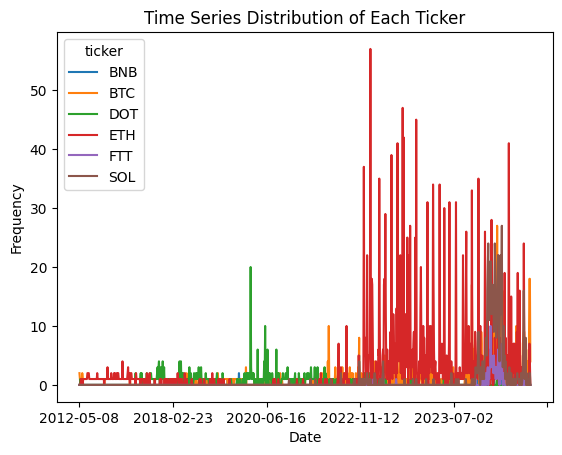

In [36]:
df_grouped2 = df_filtered2.groupby(['ticker', 'created_at']).size().unstack(fill_value=0)

# 시계열 그래프 그리기
df_grouped2.T.plot(kind='line') # 'bar'는 막대 그래프, 'line'은 선 그래프
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Time Series Distribution of Each Ticker')
plt.show()

In [40]:
pd.set_option('display.max_rows', 15)  # 모든 행을 출력하도록 설정
date_counts = df_filtered2['created_at'].value_counts()
date_counts

created_at
2023-10-26    65
2022-12-08    59
2023-11-03    58
2023-08-31    55
2023-10-12    51
              ..
2018-10-13     1
2018-10-01     1
2018-09-20     1
2018-08-15     1
2018-08-14     1
Name: count, Length: 965, dtype: int64

#### 2023 9.30 ~ 2023. 12.31 (3개월) 기간의 데이터 확인

In [44]:
start_date = '2023-09-30'
end_date = '2023-12-31'
filtered_df3 = df_filtered2[(df['created_at'] >= start_date) & (df_filtered2['created_at'] <= end_date)]
filtered_df3.reset_index(drop=True, inplace=True)

# 결과 출력
print(filtered_df3)

      created_at                                               text ticker  \
0     2023-12-30  Fallen cryptocurrency king Sam Bankman-Fried w...    SOL   
1     2023-12-29  BlackRock named Jane Street and JPMorgan as th...    BTC   
2     2023-12-29  Former Binance chief executive Changpeng Zhao ...    BNB   
3     2023-12-29  Rick Schonberg replaces Aaron Schnarch as head...    BTC   
4     2023-12-29  Bitcoin options volume has reached a record an...    BTC   
...          ...                                                ...    ...   
1729  2023-10-01                     @crypto_linn Exactly 8 of them    BTC   
1730  2023-10-01  Would love to see a presidential candidate tha...    BTC   
1731  2023-09-30      @CrpytoEasyTigar @friendtech Maybe, we’ll see    BTC   
1732  2023-09-30  @MHiesboeck How is it not decentralized in you...    ETH   
1733  2023-09-30  @cburniske Maximalism serves no one.\n\nBigges...    BTC   

      sentiment_score  
0                -0.6  
1              

/tmp/ipykernel_3665603/3931963637.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df3 = df_filtered2[(df['created_at'] >= start_date) & (df_filtered2['created_at'] <= end_date)]


In [46]:
abc = filtered_df3['ticker'].value_counts()
abc

ticker
SOL    635
BTC    485
ETH    397
FTT    114
BNB     98
DOT      5
Name: count, dtype: int64

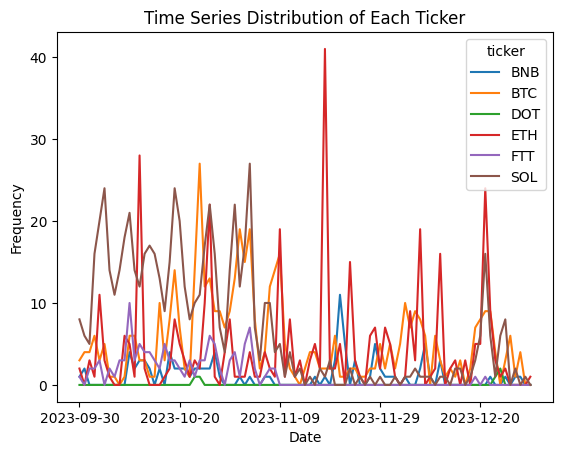

In [45]:
df_grouped3 = filtered_df3.groupby(['ticker', 'created_at']).size().unstack(fill_value=0)

# 시계열 그래프 그리기
df_grouped3.T.plot(kind='line') # 'bar'는 막대 그래프, 'line'은 선 그래프
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Time Series Distribution of Each Ticker')
plt.show()